# DECLARAMOS LAS LIBRERIAS #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [2]:
warnings.filterwarnings('ignore')

# CARGAMOS LOS PRUEBAS QUE SON CORRECTAS #

In [3]:
df = pd.read_csv('experimental_data.csv')
df.shape

(10, 15)

In [4]:
X = df.iloc[:, 1:15] 

In [5]:
X.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,682.54,518.28,696.67,546.57,709.17,535.85,928.58,716.29,915.92,739.04,973.45,702.40,1073.42,824.69
1,641.26,583.49,670.88,591.67,676.28,573.60,890.68,669.90,803.73,690.07,865.35,808.97,909.23,886.37
2,707.53,558.40,745.78,540.54,735.86,570.17,934.01,687.43,956.67,718.37,1013.99,751.33,1024.18,891.69
3,700.31,584.17,661.71,606.90,717.17,594.54,811.61,680.59,936.10,771.09,963.66,795.07,1000.40,987.65
4,654.94,634.39,665.15,632.51,663.34,637.80,673.37,757.11,824.57,744.92,886.94,797.50,985.06,840.04


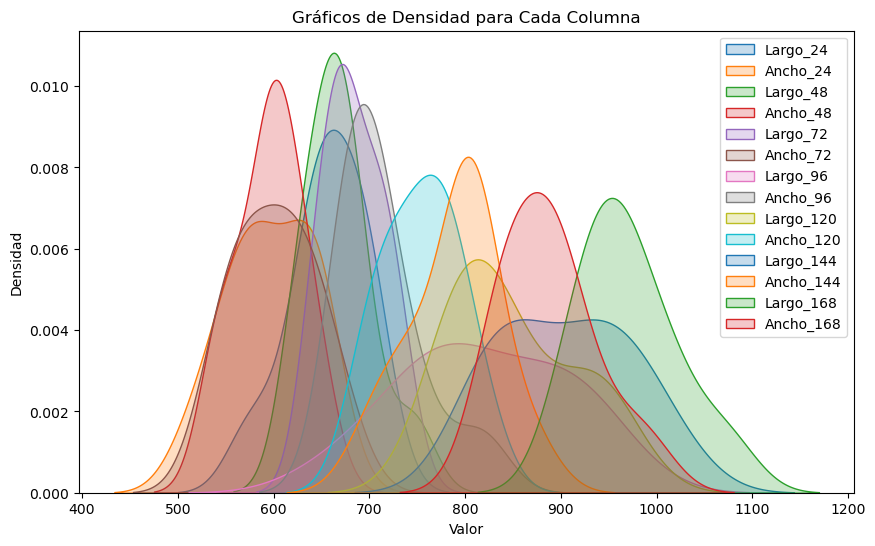

In [6]:
# Crear gráficos de densidad para cada columna
plt.figure(figsize=(10, 6))

for column in X.columns:
    sns.kdeplot(X[column], fill=True, label=column, bw_adjust=1)

plt.title('Gráficos de Densidad para Cada Columna')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# UTILIZAMOS KERNEL DENSITY

Para estimar la densidad de los datos y luego generar nuevas muestras a partir de esta densidad.

In [7]:
# Definir un rango de valores de bandwidth para buscar
params = {'bandwidth': np.linspace(0.1, 1.0, 30)}

# Crear el modelo KernelDensity
kde = KernelDensity(kernel='gaussian')

# Configurar la búsqueda en cuadrícula con CV(5 folds)
grid = GridSearchCV(kde, params, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid.fit(X)

# Evaluar el modelo utilizando el mejor bandwidth
kde_best = grid.best_estimator_

print("Mejor bandwidth encontrado:", grid.best_params_['bandwidth'])

Mejor bandwidth encontrado: 1.0


In [8]:
kde_best.fit(X)

new_samples = kde_best.sample(5)


df_new_samples = pd.DataFrame(new_samples, columns=X.columns)

df_new_samples.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,708.104721,557.493858,745.764411,539.584572,735.601005,568.989961,934.205366,687.364807,954.775816,719.507454,1014.341501,751.613213,1024.337327,892.080170
1,644.501543,640.349378,643.191424,615.219646,649.441609,646.091354,770.061306,689.879182,793.034495,784.906457,830.637507,816.687667,952.865013,892.960200
2,619.468183,598.080541,627.022072,597.054566,672.845061,613.359860,759.299618,719.699796,796.267587,794.015953,833.349249,814.993004,953.454545,854.049402
3,700.399296,585.033663,661.839043,608.351389,716.823052,595.892271,810.707687,680.764298,935.111858,771.599349,963.268610,793.740787,1000.655771,989.452089
4,654.332836,635.142686,664.584439,633.568785,664.152273,637.357572,672.746778,758.042356,822.598069,744.518133,887.226180,796.540828,985.346247,837.656674


In [9]:
columns_largos = ['Largo_24','Largo_48','Largo_72','Largo_96','Largo_120', 'Largo_144', 'Largo_168']
columns_anchos = ['Ancho_24','Ancho_48','Ancho_72','Ancho_96','Ancho_120', 'Ancho_144', 'Ancho_168']

# CALCULAMOS LOS VALORES PARA CADA INTERVALO DE TIEMPO 

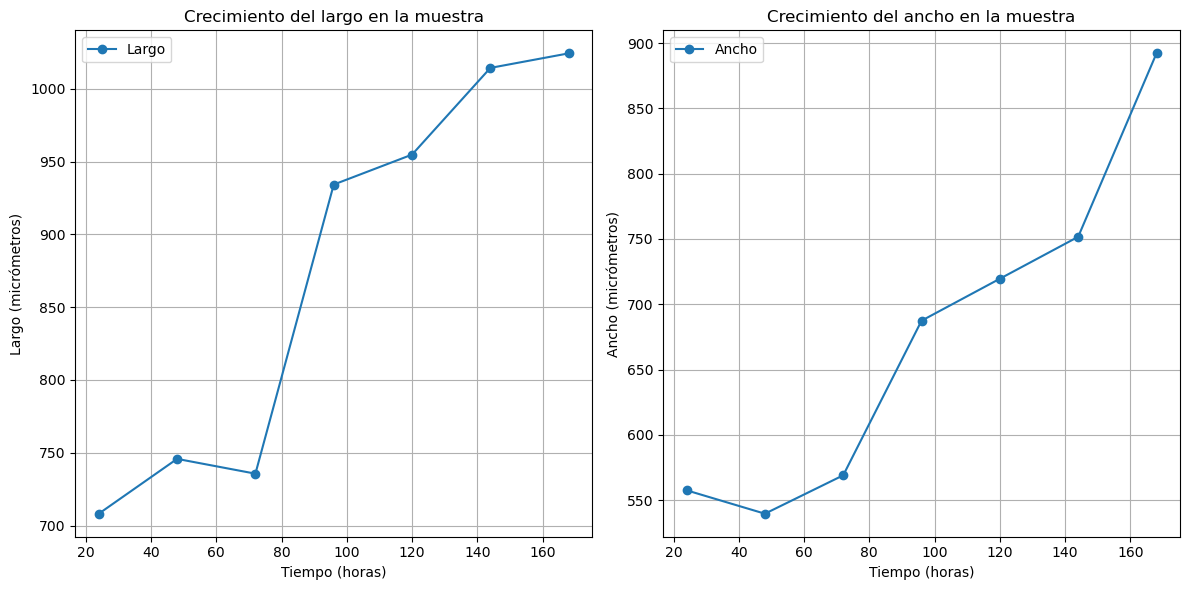

Tiempo: 24 horas -> Largo: 708.10 µm, Ancho: 557.49 µm
Tiempo: 48 horas -> Largo: 745.76 µm, Ancho: 539.58 µm
Tiempo: 72 horas -> Largo: 735.60 µm, Ancho: 568.99 µm
Tiempo: 96 horas -> Largo: 934.21 µm, Ancho: 687.36 µm
Tiempo: 120 horas -> Largo: 954.78 µm, Ancho: 719.51 µm
Tiempo: 144 horas -> Largo: 1014.34 µm, Ancho: 751.61 µm
Tiempo: 168 horas -> Largo: 1024.34 µm, Ancho: 892.08 µm


In [10]:
# Tiempos de medición (en horas)
tiempos = np.array([24, 48, 72, 96, 120, 144, 168])

#Obtenemos los valores de la primera muestra generada con Kernel
largos = df_new_samples[columns_largos].iloc[0].values
anchos = df_new_samples[columns_anchos].iloc[0].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para largos
plt.subplot(1, 2, 1)
plt.plot(tiempos, largos, 'o-', label='Largo')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Largo (micrómetros)')
plt.title('Crecimiento del largo en la muestra')
plt.legend()
plt.grid(True)

# Gráfico para anchos
plt.subplot(1, 2, 2)
plt.plot(tiempos, anchos, 'o-', label='Ancho')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Ancho (micrómetros)')
plt.title('Crecimiento del ancho en la muestra')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,largos, anchos)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")


# DEFINIMOS LOS PARAMETROS PARA LAS GRÁFICAS

In [11]:
# Definir los parámetros de los esferoides
# Datos iniciales
c1 = largos[0] # Distancia desde el centro hasta el polo del primer esferoide(Largo)
a1 = anchos[0] # Semieje ecuatorial del primer esferoide(Ancho)

c2 = largos[6]# Distancia desde el centro hasta el polo del segundo esferoide(Largo)
a2 = anchos[6]# Semieje ecuatorial del segundo esferoide(Ancho)

In [12]:
# Crear valores para los ángulos phi y theta
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

In [13]:
# Calcular las coordenadas cartesianas de los dos esferoides
x1 = a1 * np.outer(np.cos(phi), np.sin(theta))
y1 = a1 * np.outer(np.sin(phi), np.sin(theta))
z1 = c1 * np.outer(np.ones(np.size(phi)), np.cos(theta))

x2 = a2 * np.outer(np.cos(phi), np.sin(theta))
y2 = a2 * np.outer(np.sin(phi), np.sin(theta))
z2 = c2 * np.outer(np.ones(np.size(phi)), np.cos(theta))

# GRAFICO UNO SOBRE OTRO

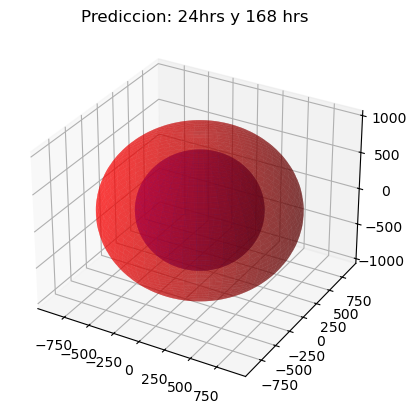

In [14]:
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los dos esferoides
ax.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='r', alpha=0.5)

# Ajustar la relación de aspecto de los ejes
ax.set_aspect('auto')
ax.set_title('Prediccion: 24hrs y 168 hrs')

# Mostrar el gráfico
plt.show()


# GRAFICO INICIO-FINAL

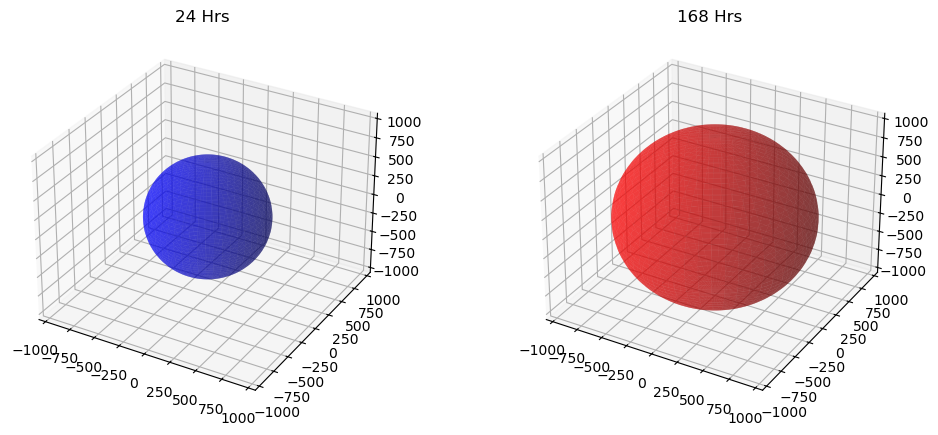

In [15]:
#Encontrar limites inferiores y maximos
max_lim = max(np.max(x1), np.max(y1), np.max(z1), np.max(x2), np.max(y2), np.max(z2))
min_lim = min(np.min(x1), np.min(y1), np.min(z1), np.min(x2), np.min(y2), np.min(z2))

# Crear las figuras y los ejes 3D
fig = plt.figure(figsize=(12, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax1.set_title('24 Hrs')
ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)
ax1.set_zlim(min_lim, max_lim)


# Subgráfico 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, z2, color='r', alpha=0.5)
ax2.set_title('168 Hrs')
ax2.set_xlim(min_lim, max_lim)
ax2.set_ylim(min_lim, max_lim)
ax2.set_zlim(min_lim, max_lim)

# Mostrar los gráficos
plt.show()

# GRAFICA DE INTERPOLADO 24-168hrs

En el análisis numérico, se denomina interpolación a obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

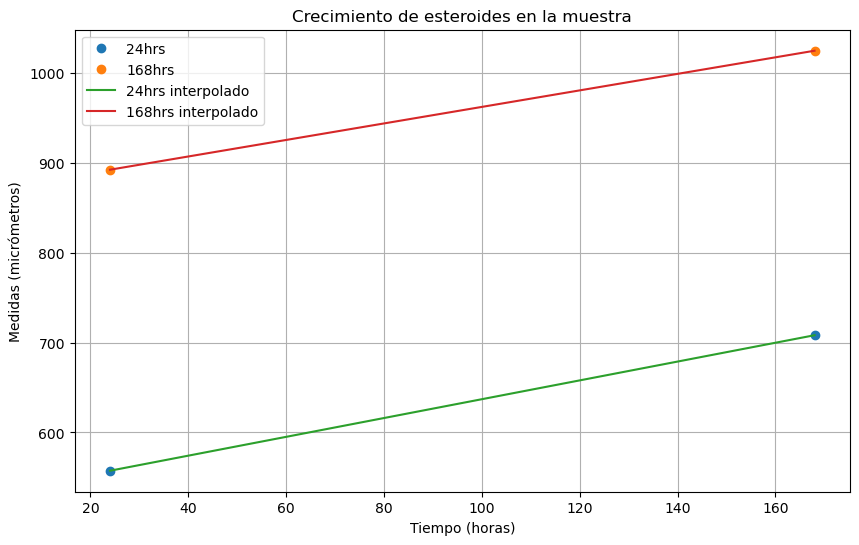

Tiempo: 24 horas -> Largo: 557.49 µm, Ancho: 892.08 µm
Tiempo: 168 horas -> Largo: 582.60 µm, Ancho: 914.12 µm


In [16]:
tiempos = np.array([24, 168])  # tiempos en horas
medidas_1 = np.array([a1, c1])  # largo 1 en micrómetros
medidas_2 = np.array([a2, c2])  # largo 2 en micrómetros

# Interpolación lineal para encontrar largos intermedios
tiempos_intermedios = np.array([24, 48, 72, 96, 120, 144, 168])  # tiempos intermedios

# Funciones de interpolación lineal
interp_medidas_1 = np.interp(tiempos_intermedios, tiempos, medidas_1)
interp_medidas_2 = np.interp(tiempos_intermedios, tiempos, medidas_2)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, medidas_1, 'o', label='24hrs')
plt.plot(tiempos, medidas_2, 'o', label='168hrs')
plt.plot(tiempos_intermedios, interp_medidas_1, '-', label='24hrs interpolado')
plt.plot(tiempos_intermedios, interp_medidas_2, '-', label='168hrs interpolado')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Medidas (micrómetros)')
plt.title('Crecimiento de esteroides en la muestra')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,interp_medidas_1, interp_medidas_2)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")
    